# We are going to look at earthquake data.
The USGC has a data file with all earthquakes above 5.5 on the Richter scale from 1900 to 2008.
It can be downloaded here: http://earthquake.usgs.gov/data/centennial/. Thats over 15000 earthquakes in total, and we are going to use python to analyse it :)

Based on this dataset, I have created a small set of files which we are going to use in today's analysis. You can find the files in our Goole Drive if you do not have them yet.


A brief description of the files:

   - **eqs-year.txt** is a text file with 2 columns (separated by a comma). For each year (first column, to be read as an integer) its got the total number of earthquakes (above 5.5) which happened that year (seconds column, to be read as a float. Yes that was a mistake, sorry!).
   - **mscale-year.txt** is the same as above, but as the average measreuments on the Richter scale of all earthquakes that happened that year (also as a float, this time intentional!).
   - **country-quake.txt** The total number of earthquakes per country. Its got two columns separated by a comma, first column is country name (as a string) and the second is the total number of earchquakes (above 5.5) which happened since 1900 in that country (to be read as an int).
   - **all-quakes.txt** Every single earchquake (above 5.5) recorded, described by three columns **separated by tab**: year, country, scale.
    
** NOTE: ** This data may differ a little from that in the original dataset, as I cleaned and filtered out many values I was not sure about. That doesn't matter, its just about having some realistic data to work with.

## Number of earthquakes per year

Let's read the data from **eqs-year.txt** and create a plot of the number of earthquakes that have happened each year.

##### Hints and tips

We are going to import the data using standard python functions for dealing with files. The following commands will be useful:

- **open(**filename**, "rU")** creates a "file handle" to read (that's that the "rU" is for) to read the file with the name filename.
- **strip()** removes beginning and ending "junk" characters from our line (all whitespaces (" "), tab ("\t"), and newline ("\n") characters.
- **split(**delimiter**)** splits a string on each occcurence of delimiter, and returns a list of strings. If no delimiter is given, it splits the default is all spaces (" ") and tabs ("\t").

Below we open the file, read it line by line, and store the values in two lists for plotting them later.

In [5]:
handle = open("eqs-year.txt", "rU")
years = []
numbers = []
for line in handle:
    
    # clean the line, and split by commma
    cleaned_line = line.strip()
    data = cleaned_line.split(",")
    
    # convert the data from string to int
    year = int(data[0])
    number = int(float(data[1])) # marc was silly, and stored the data as a float.
    
    # append the data to the lists
    years.append(year)
    numbers.append(number)

# close the file
handle.close()

# print these numbers, just to be sure everything is OK
print len(years)
print len(numbers)


44
44


## Lets make a plot!

Using maplotlib its easy to create a plot.

Check the maplotlib documentation and gallery for information and inspiration:

- http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
- http://matplotlib.org/gallery.html


##### Hits and tips

- The "magic" line **"%maplotlib inline"** causes all plots to apper in the notebook (not in a new window).
- **plot(**x,y**)** takes 2 arguments: two lists of numbers represending the *x* and *y* coordinates to plot



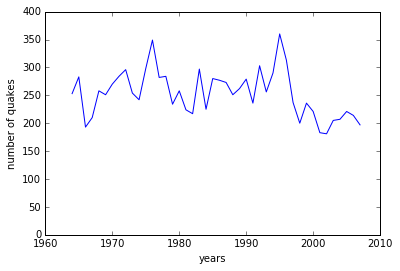

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(years,numbers)
plt.ylim([0,400])
plt.xlabel("years")
plt.ylabel("number of quakes")
plt.show()

## Which countries to avoid!

Lets make a barplot of how many earthquakes have happened in each country.

As this plot is really big (and illegible), create the barplot for all countries that have had over 400 earthquakes in the past 100 years.

**NOTE** The country is not part of the original dataset, I added that separately!

In [12]:
handle = open("country-quake.txt", "rU")
countries = []
quakes = []
for line in handle:
    cleaned_line = line.strip()
    data = cleaned_line.split(",")
    country = data[0]
    quake = int(data[1])
    
    # only if there were over 400 earthquakes
    # append the data to the list.
    if quake > 400:
        countries.append(country)
        quakes.append(quake)
handle.close()

[0, 1, 2, 3, 4, 5, 6, 7]


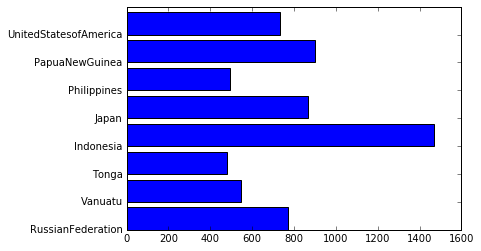

In [13]:
# for the barplot we will need a 'dummy' list to server as the "y coordinates".
# We'll add the names later!
y_pos = range(len(countries))
print y_pos

# barh makes a horizontal barplot.
plt.barh(y_pos,quakes)  

# set the "ticks" to the country names
plt.yticks(y_pos,countries)

plt.show()

## Thats all for now!